In [7]:
#reading data
#eda
#feature eng
#feature selection
#scaling
#model build
#deployment

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
plant_1_generation = pd.read_csv('Plant_1_Generation_Data.csv')
plant_2_generation = pd.read_csv('Plant_2_Generation_Data.csv')
plant_1_weather = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
plant_2_weather = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [23]:
print("Plant 1 Generation Data:")
print(plant_1_generation.head())
print("\nPlant 2 Generation Data:")
print(plant_2_generation.head())
print("\nPlant 1 Weather Sensor Data:")
print(plant_1_weather.head())
print("\nPlant 2 Weather Sensor Data:")
print(plant_2_weather.head())

Plant 1 Generation Data:
          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  

Plant 2 Generation Data:
             DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3  2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       

In [35]:
# Merge generation and weather data based on time
plant_1 = pd.merge(plant_1_generation, plant_1_weather, on='DATE_TIME', how='inner')
plant_2 = pd.merge(plant_2_generation, plant_2_weather, on='DATE_TIME', how='inner')


In [37]:
combined_data = pd.concat([plant_1, plant_2], ignore_index=True)

In [39]:
print("\nMissing values per column:")
print(combined_data.isnull().sum())


Missing values per column:
DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
PLANT_ID_y             0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [61]:
# Step 5: Handle missing values for numeric columns only
numeric_columns = combined_data.select_dtypes(include=[np.number]).columns
combined_data[numeric_columns] = combined_data[numeric_columns].fillna(combined_data[numeric_columns].mean())


In [43]:
combined_data['DATE_TIME'] = pd.to_datetime(combined_data['DATE_TIME'])
combined_data['hour'] = combined_data['DATE_TIME'].dt.hour
combined_data['day'] = combined_data['DATE_TIME'].dt.day
combined_data['month'] = combined_data['DATE_TIME'].dt.month


In [45]:
X = combined_data[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'hour', 'day', 'month']]
y = combined_data['DC_POWER']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
# Step 9: Train a predictive model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
y_pred = model.predict(X_test)

In [53]:
# Step 11: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Model Performance:
Mean Squared Error: 44064.504694691816
R2 Score: 0.6771693794561763


In [55]:
# Step 12: Plot feature importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

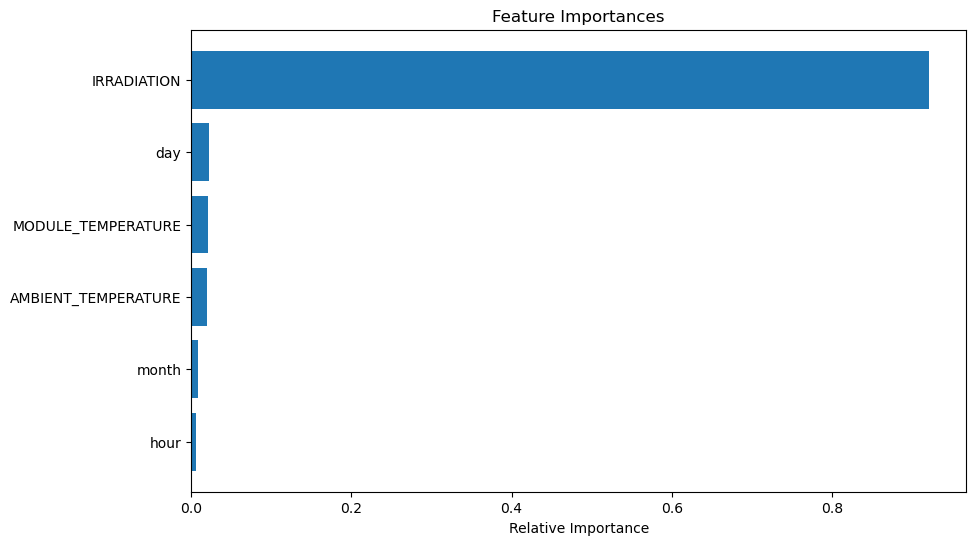

In [57]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()